In [ ]:
#Linear Regression

In [3]:
# 1. Load the dataset and display its shape, column names, and first 5 rows
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\keert\Downloads\gold_price_data.csv")   # change file name if different
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nFirst 5 rows:\n", df.head())

Shape of dataset: (5215, 7)

Column names:
 Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

First 5 rows:
          date       open       high        low      close  adj_close    volume
0  2004-11-18  44.380001  44.380001  44.490002  44.070000  44.430000   5992000
1  2004-11-19  44.779999  44.779999  44.919998  44.470001  44.490002  11655300
2  2004-11-22  44.950001  44.950001  44.970001  44.740002  44.750000  11996000
3  2004-11-23  44.750000  44.750000  44.919998  44.720001  44.880001   3169200
4  2004-11-24  45.049999  45.049999  45.049999  44.790001  44.930000   6105100


In [13]:
# 2. Check for missing values and duplicates. Clean if necessary
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Handling
df = df.drop_duplicates()
df = df.ffill()   # forward fill


Missing values:
 date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

Duplicate rows: 0



Descriptive Statistics:
               open         high          low        close    adj_close  \
count  5215.000000  5215.000000  5215.000000  5215.000000  5215.000000   
mean    131.940968   131.940968   132.570993   131.256556   131.939183   
std      51.291094    51.291094    51.459284    51.073175    51.282084   
min      41.259998    41.259998    41.360001    41.020000    41.029999   
25%     104.730000   104.730000   105.355000   104.160000   104.754997   
50%     124.400002   124.400002   124.870003   123.980003   124.459999   
75%     164.779999   164.779999   165.489998   164.004997   164.544998   
max     316.290009   316.290009   317.630005   315.040009   317.489990   

             volume  
count  5.215000e+03  
mean   9.423568e+06  
std    6.645282e+06  
min    3.193000e+05  
25%    5.305150e+06  
50%    7.818800e+06  
75%    1.154915e+07  
max    9.380420e+07  


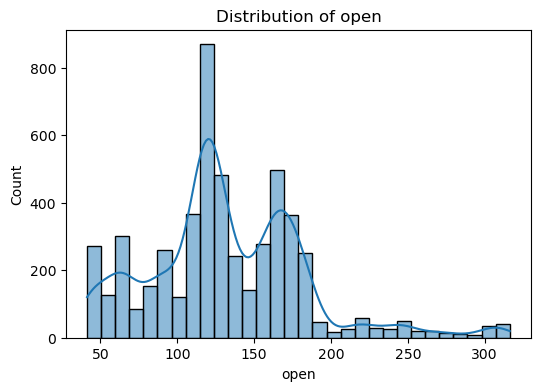

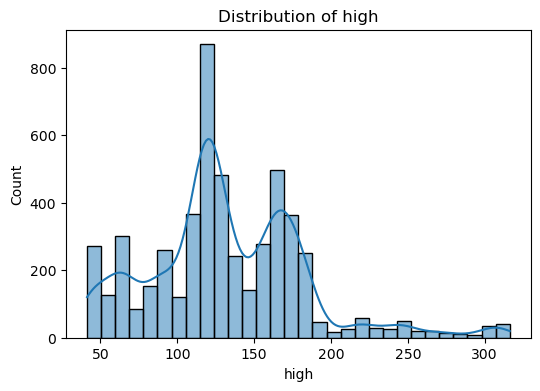

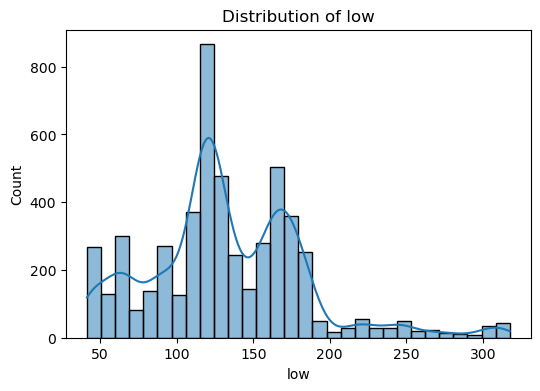

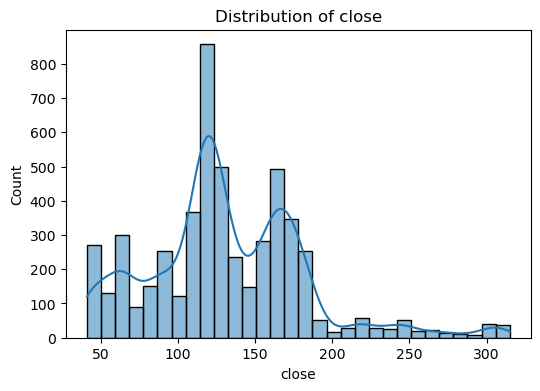

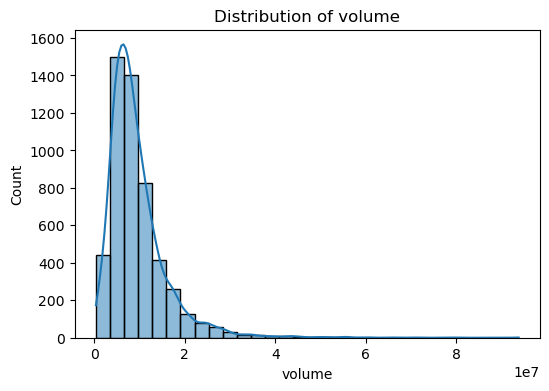

In [17]:
# 3. Exploratory Data Analysis (EDA)
print("\nDescriptive Statistics:\n", df.describe())

import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of key features
features = ["open", "high", "low", "close", "volume"]
for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


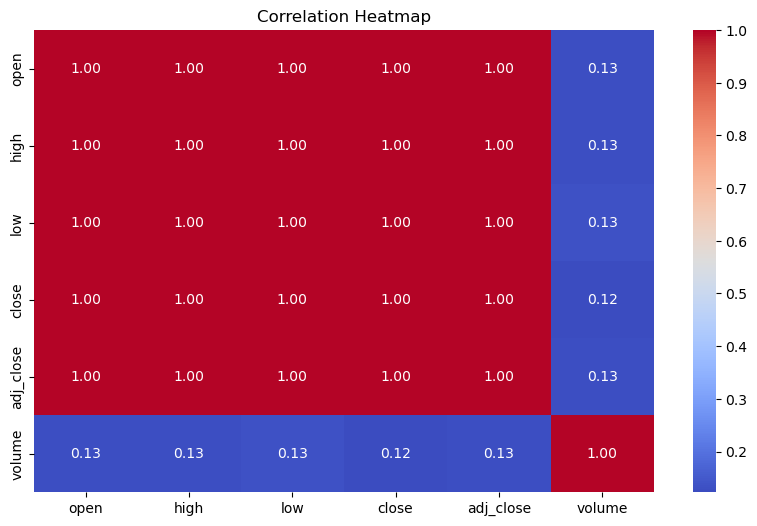

In [21]:
# 4. Correlation Heatmap (numeric columns only)
plt.figure(figsize=(10,6))

numeric_df = df.select_dtypes(include=['number'])   # keep only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


In [25]:
# 5. Select independent & target variables
X = df[["open", "high", "low", "volume"]]   # independent variables
y = df["close"]                             # target variable


In [27]:
# 6. Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (4172, 4)
Testing set size: (1043, 4)


In [29]:
# 7. Train Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# 8. Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.2584577487598691
Root Mean Squared Error (RMSE): 0.5083874002764713
R² Score: 0.9999031349631096


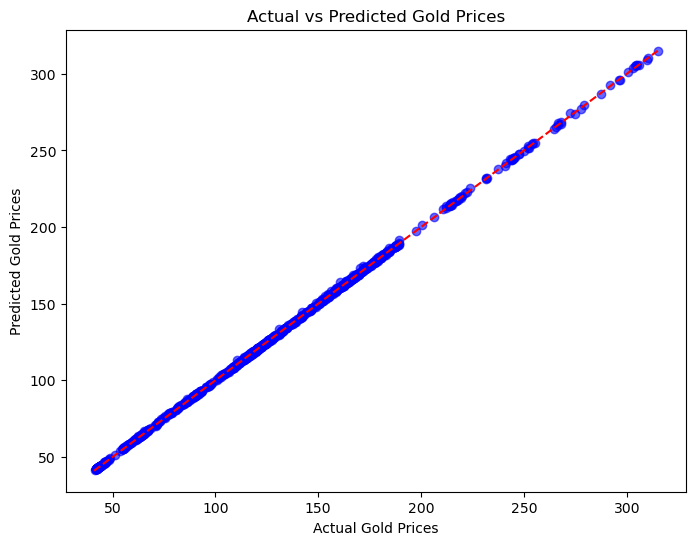

In [33]:
# 9. Plot Actual vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Gold Prices")
plt.ylabel("Predicted Gold Prices")
plt.title("Actual vs Predicted Gold Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.show()


In [35]:
# 10. Interpret coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("\nModel Coefficients:\n", coefficients)
print("\nIntercept:", model.intercept_)



Model Coefficients:
   Feature   Coefficient
0    open  2.881921e-01
1    high  2.881921e-01
2     low  4.188493e-01
3  volume -5.645234e-08

Intercept: 0.21487234140178657
